In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.52 🚀 Python-3.8.10 torch-2.3.1 CPU (aarch64)
Setup complete ✅ (16 CPUs, 30.8 GB RAM, 42.4/193.6 GB disk)


In [4]:
!yolo predict model=yolov8n.pt source='/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/0a22f881b77f00220f2034c21a18b854/rev-thumbnail-mpu.jpg'

Ultralytics YOLOv8.2.52 🚀 Python-3.8.10 torch-2.3.1 CPU (aarch64)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/0a22f881b77f00220f2034c21a18b854/rev-thumbnail-mpu.jpg: 320x640 4 persons, 3 cars, 170.9ms
Speed: 2.5ms preprocess, 170.9ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)
Results saved to /home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [5]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access your OpenAI API key
openai_api_key = os.getenv("OPENAI_API_KEY")

In [2]:
import base64
import requests


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/0a22f881b77f00220f2034c21a18b854/end-allentown.png"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4o",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-9jW27FGugkquGnlJzHPKK0qukNTza', 'object': 'chat.completion', 'created': 1720634923, 'model': 'gpt-4o-2024-05-13', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The image appears to be an advertisement or informational graphic for a Lexus dealership. Here are the elements present in the image:\n\n1. **Logo and Branding:**\n   - The top left corner features the Lexus logo and the text "L/Certified by Lexus."\n\n2. **Dealership Information:**\n   - The name of the dealership, "Lexus of Lehigh Valley."\n   - The address of the dealership: 4500 Broadway, Allentown, PA.\n\n3. **Map:**\n   - A small map is shown highlighting the location of the dealership.\n   - Nearby landmarks indicated on the map:\n     - Cetronia Ambulance Corps\n     - St. Luke’s West End Medical Center\n\n4. **Car Image:**\n   - There is an image of a Lexus car, likely to promote the brand.\n\nThe provided information is a mixture of text and visual elements meant to guide potent

In [3]:
import cv2
img= cv2.imread("/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/0a22f881b77f00220f2034c21a18b854/end-allentown.png")

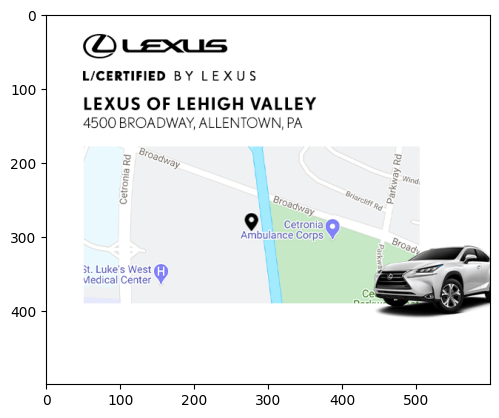

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
import base64
import requests


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/0a22f881b77f00220f2034c21a18b854/end-allentown.png"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4o",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": ""
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

In [2]:
import autogen 
from autogen import ConversableAgent
import os
from autogen.coding import LocalCommandLineCodeExecutor
# The code writer agent's system message is to instruct the LLM on how to use
# the code executor in the code executor agent.
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    code_execution_config=False,  # Turn off code execution for this agent.
)

In [6]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

In [7]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Write Python code to calculate the 14th Fibonacci number.",
)

code_executor_agent (to code_writer_agent):

Write Python code to calculate the 14th Fibonacci number.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

Sure, here is a function to calculate the Fibonacci number for a given position. The function uses a loop to iterate and calculate the Fibonacci number:

```python
def fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

print(fibonacci(14))
```

This function starts with a = 0 and b = 1 which are the first two numbers in the Fibonacci sequence. In each pass of the loop, the function both assigns b to a and a + b to b and does these assignments in parallel.

Finally, it prints the 14th Fibonacci number. Just run the code and you'll get the number.

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

